# 📘 K-Nearest Neighbors (KNN) — Regression

K-Nearest Neighbors (KNN) can also be used for **regression problems**, where the target variable is **continuous** (numerical).

Examples:
- House price prediction
- Temperature prediction
- Sales forecasting

Unlike parametric models, **KNN Regressor does not learn a formula**.  
It makes predictions purely based on **nearby data points**.

---

## 🔹 1. Core Idea of KNN Regression

> **“A data point’s value is similar to the values of its nearest neighbors.”**

To predict the output for a new data point:
1. Choose a value for **K**
2. Compute the distance between the new point and all training points
3. Select the **K nearest neighbors**
4. Predict the output by **aggregating their target values**

---

## 🔹 2. How Prediction Works in KNN Regression

### Mean-based Prediction (Most Common)

$$
\hat{y} = \frac{1}{K} \sum_{i=1}^{K} y_i
$$

- Take the **average** of the target values of the K nearest neighbors
- Sensitive to outliers

---

### Median-based Prediction (Robust Alternative)

$$
\hat{y} = \text{median}(y_1, y_2, \dots, y_K)
$$

- Reduces the impact of extreme values
- Useful when data contains outliers

---

## 🔹 3. Role of K in Regression

- **K** controls smoothness of the prediction
- K is a **hyperparameter**

### Effect of K:
- **Small K**
  - Very sensitive to noise
  - Predictions closely follow training data
  - High variance (overfitting)

- **Large K**
  - Predictions are smoother
  - May ignore local patterns
  - High bias (underfitting)

Choosing the right K is critical and usually done using **cross-validation**.

---

## 🔹 4. Distance Metrics in KNN Regression

Just like classification, KNN regression depends on distance calculations.

Common metrics:
- **Euclidean distance** (default)
- **Manhattan distance**

Closer neighbors have more influence on the prediction.

---

## 🔹 5. Weighted KNN Regression

Instead of treating all neighbors equally, KNN can assign **higher weight to closer neighbors**.

- Nearest points influence prediction more
- Farther points influence prediction less

This often improves regression performance.

---

## 🔹 6. Important Characteristics of KNN Regressor

- No training phase (lazy learner)
- Prediction is computationally expensive
- Sensitive to:
  - Feature scaling
  - Choice of K
  - Distance metric
  - Presence of outliers

---

## 🔹 7. Time Complexity

Prediction time complexity:

$$
\mathcal{O}(n)
$$

Where:
- $n$ = number of training samples

This makes KNN regression less suitable for very large datasets.

---

## 🎯 Summary

- KNN Regressor predicts **continuous values**
- Uses **average or median** of nearest neighbors
- K controls smoothness vs noise sensitivity
- Requires **feature scaling**
- Simple, intuitive, but computationally expensive

KNN Regression works best for **small to medium datasets** where local patterns matter.


In [1]:
# pandas → used for data manipulation and tabular data handling
import pandas as pd

# numpy → used for numerical operations and array computations
import numpy as np

# matplotlib → used for basic plotting and visualizations
import matplotlib.pyplot as plt

# seaborn → built on top of matplotlib, used for statistical and advanced visualizations
import seaborn as sns

In [3]:
# make_regression → utility function to generate a synthetic regression dataset
from sklearn.datasets import make_regression

# X → generated feature matrix (input variables)
# y → generated continuous target values (output variable)
X, y = make_regression(
    n_samples=1000,     # Total number of data points to generate
    n_features=2,       # Number of input features (2D data for easy visualization)
    noise=10,           # Amount of random noise added to the target values
                        # Higher noise makes the regression problem harder
    random_state=42     # Seed for reproducibility (same dataset every run)
)


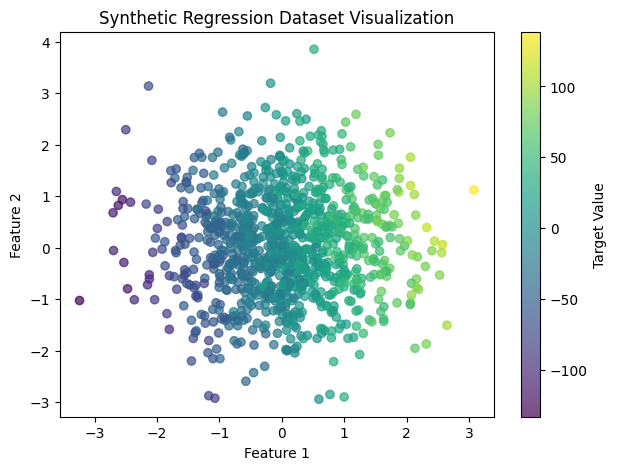

In [4]:
# -----------------------------------------------
# Visualizing the Synthetic Regression Dataset
# -----------------------------------------------

# Convert data into a DataFrame for easier handling
df = pd.DataFrame(X, columns=["feature_1", "feature_2"])
df["target"] = y

# Scatter plot: Feature 1 vs Feature 2
# Color represents the target (continuous value)
plt.figure(figsize=(7, 5))
scatter = plt.scatter(
    df["feature_1"],
    df["feature_2"],
    c=df["target"],
    cmap="viridis",
    alpha=0.7
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Regression Dataset Visualization")

# Add color bar to show target value scale
plt.colorbar(scatter, label="Target Value")

plt.show()


# 🔍 Observations from the Regression Dataset Visualization

After visualizing the synthetic regression dataset, we can clearly understand how the data is structured and why **KNN Regressor** is suitable for this problem.

---

## 📍 1. Each Point Represents One Data Sample

- Every dot in the plot represents **one data point**
- The position of the dot is defined by:
  - X-axis → Feature 1
  - Y-axis → Feature 2

---

## 🎨 2. Color Represents the Target Value

- The color of each point represents the **continuous target value**
- Similar colors indicate **similar target values**
- Different colors indicate **different target values**

This is different from classification, where colors represent classes.

---

## 🟢 3. Nearby Points Have Similar Colors

- Points that are **close to each other** tend to have **similar colors**
- This shows a **local relationship** between features and target values

👉 This is the core assumption behind **KNN Regression**.

---

## 🔀 4. Smooth Transition of Colors

- The colors change **gradually** across the plot
- There are no sharp boundaries
- This indicates the target value changes smoothly with the features

KNN Regressor captures this behavior by averaging nearby values.

---

## 📏 5. Distance Plays a Key Role

- KNN Regressor uses **distance** to decide which points influence the prediction
- Points closer to the query point contribute more to the predicted value

This is why **feature scaling** is important for KNN.

---

## 🎯 Final Takeaway

- The dataset shows strong **local patterns**
- Similar inputs produce similar outputs
- KNN Regressor works well when:
  - Data is continuous
  - Local relationships exist
  - Dataset size is manageable

This visualization helps us understand **how KNN Regression learns without learning a model**.


In [ ]:
# Import function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the regression dataset into train and test sets
# X → feature matrix
# y → continuous target values
# test_size=0.33 → 33% of the data is reserved for testing, 67% for training
# random_state=42 → ensures the same split every time for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(
    n_neighbors=5, algorithm='auto'
)

regressor.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# Import KNeighborsRegressor used for KNN-based regression
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN Regressor object
# n_neighbors=5 → uses 5 nearest neighbors to predict the target value
# algorithm='auto' → lets scikit-learn choose the best search algorithm
#                    (brute-force, KD-Tree, or Ball-Tree) automatically
regressor = KNeighborsRegressor(
    n_neighbors=5, algorithm='auto'
)

# Train (fit) the KNN Regressor
# X_train → training feature data
# y_train → corresponding continuous target values
# KNN Regressor stores the training data and performs no explicit model learning
regressor.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
# -----------------------------------------------
# Predictions and Evaluation Metrics for KNN Regressor
# -----------------------------------------------

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use the trained KNN Regressor to predict target values for test data
# X_test → unseen feature values
# The prediction is the average of target values of the K nearest neighbors
y_pred = regressor.predict(X_test)

# -----------------------------------------------
# Regression Evaluation Metrics
# -----------------------------------------------

# 1️⃣ Mean Squared Error (MSE)
# Measures the average of squared differences between actual and predicted values
# Penalizes larger errors more heavily
mse = mean_squared_error(y_test, y_pred)

# 2️⃣ Root Mean Squared Error (RMSE)
# Square root of MSE
# Interpretable in the same unit as the target variable
rmse = np.sqrt(mse)

# 3️⃣ Mean Absolute Error (MAE)
# Average of absolute differences between actual and predicted values
# Less sensitive to outliers compared to MSE
mae = mean_absolute_error(y_test, y_pred)

# 4️⃣ R-squared (R² Score)
# Indicates how well the model explains the variance in the target variable
# Value closer to 1 → better model
r2 = r2_score(y_test, y_pred)

# -----------------------------------------------
# Display Results
# -----------------------------------------------

print("🔹 Mean Squared Error (MSE):", mse)
print("🔹 Root Mean Squared Error (RMSE):", rmse)
print("🔹 Mean Absolute Error (MAE):", mae)
print("🔹 R² Score:", r2)


🔹 Mean Squared Error (MSE): 132.70133826064995
🔹 Root Mean Squared Error (RMSE): 11.519606688626567
🔹 Mean Absolute Error (MAE): 9.269174435861803
🔹 R² Score: 0.9155927746462499


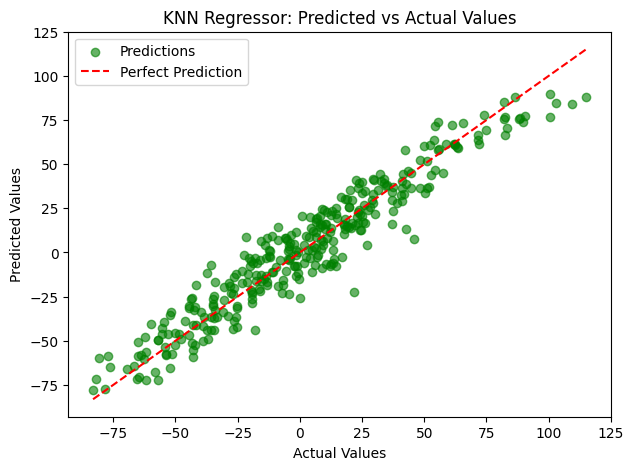

In [11]:
# -----------------------------------------------
# Visualization: Predicted vs Actual Values
# -----------------------------------------------

import matplotlib.pyplot as plt

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(7, 5))

plt.scatter(
    y_test, # Actual target values
    y_pred, # Predicted target values
    alpha=0.6,
    color="green",
    label="Predictions"
    )
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", label="Perfect Prediction")

plt.legend()

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("KNN Regressor: Predicted vs Actual Values")

plt.show()
